# 따라하기
- 출처 : https://www.kaggle.com/ohadorbach/fuel-is-all-you-need
- Fuel Consumption : 100km에 소비하는 양
- Fuel Consumption Comb : City/Hwy = 55/45 비율로 섞음
- mpg * 0.425 = KM/L (연비)
- 의문
    1. 여러 변수와 co2 배출량 사이의 관계
    2. co2 배출에 가장 큰 영향을 끼치는 변수
    3. city와 hwy에 따라 배출량이 다를까

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [184]:
data = pd.read_csv('./datas/CO2 Emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Fuel Consumption Comb calculated?

In [22]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [25]:
v1 = data['Fuel Consumption City (L/100 km)']
v2 = data['Fuel Consumption Hwy (L/100 km)']
v3 = data['Fuel Consumption Comb (L/100 km)']
A = np.column_stack([v1, v2])
x = np.linalg.lstsq(A, v3, rcond=-1)
print(x[0])

[0.54977202 0.45035134]


In [27]:
## 오브젝트 타입 확인
data.describe(include=['O'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


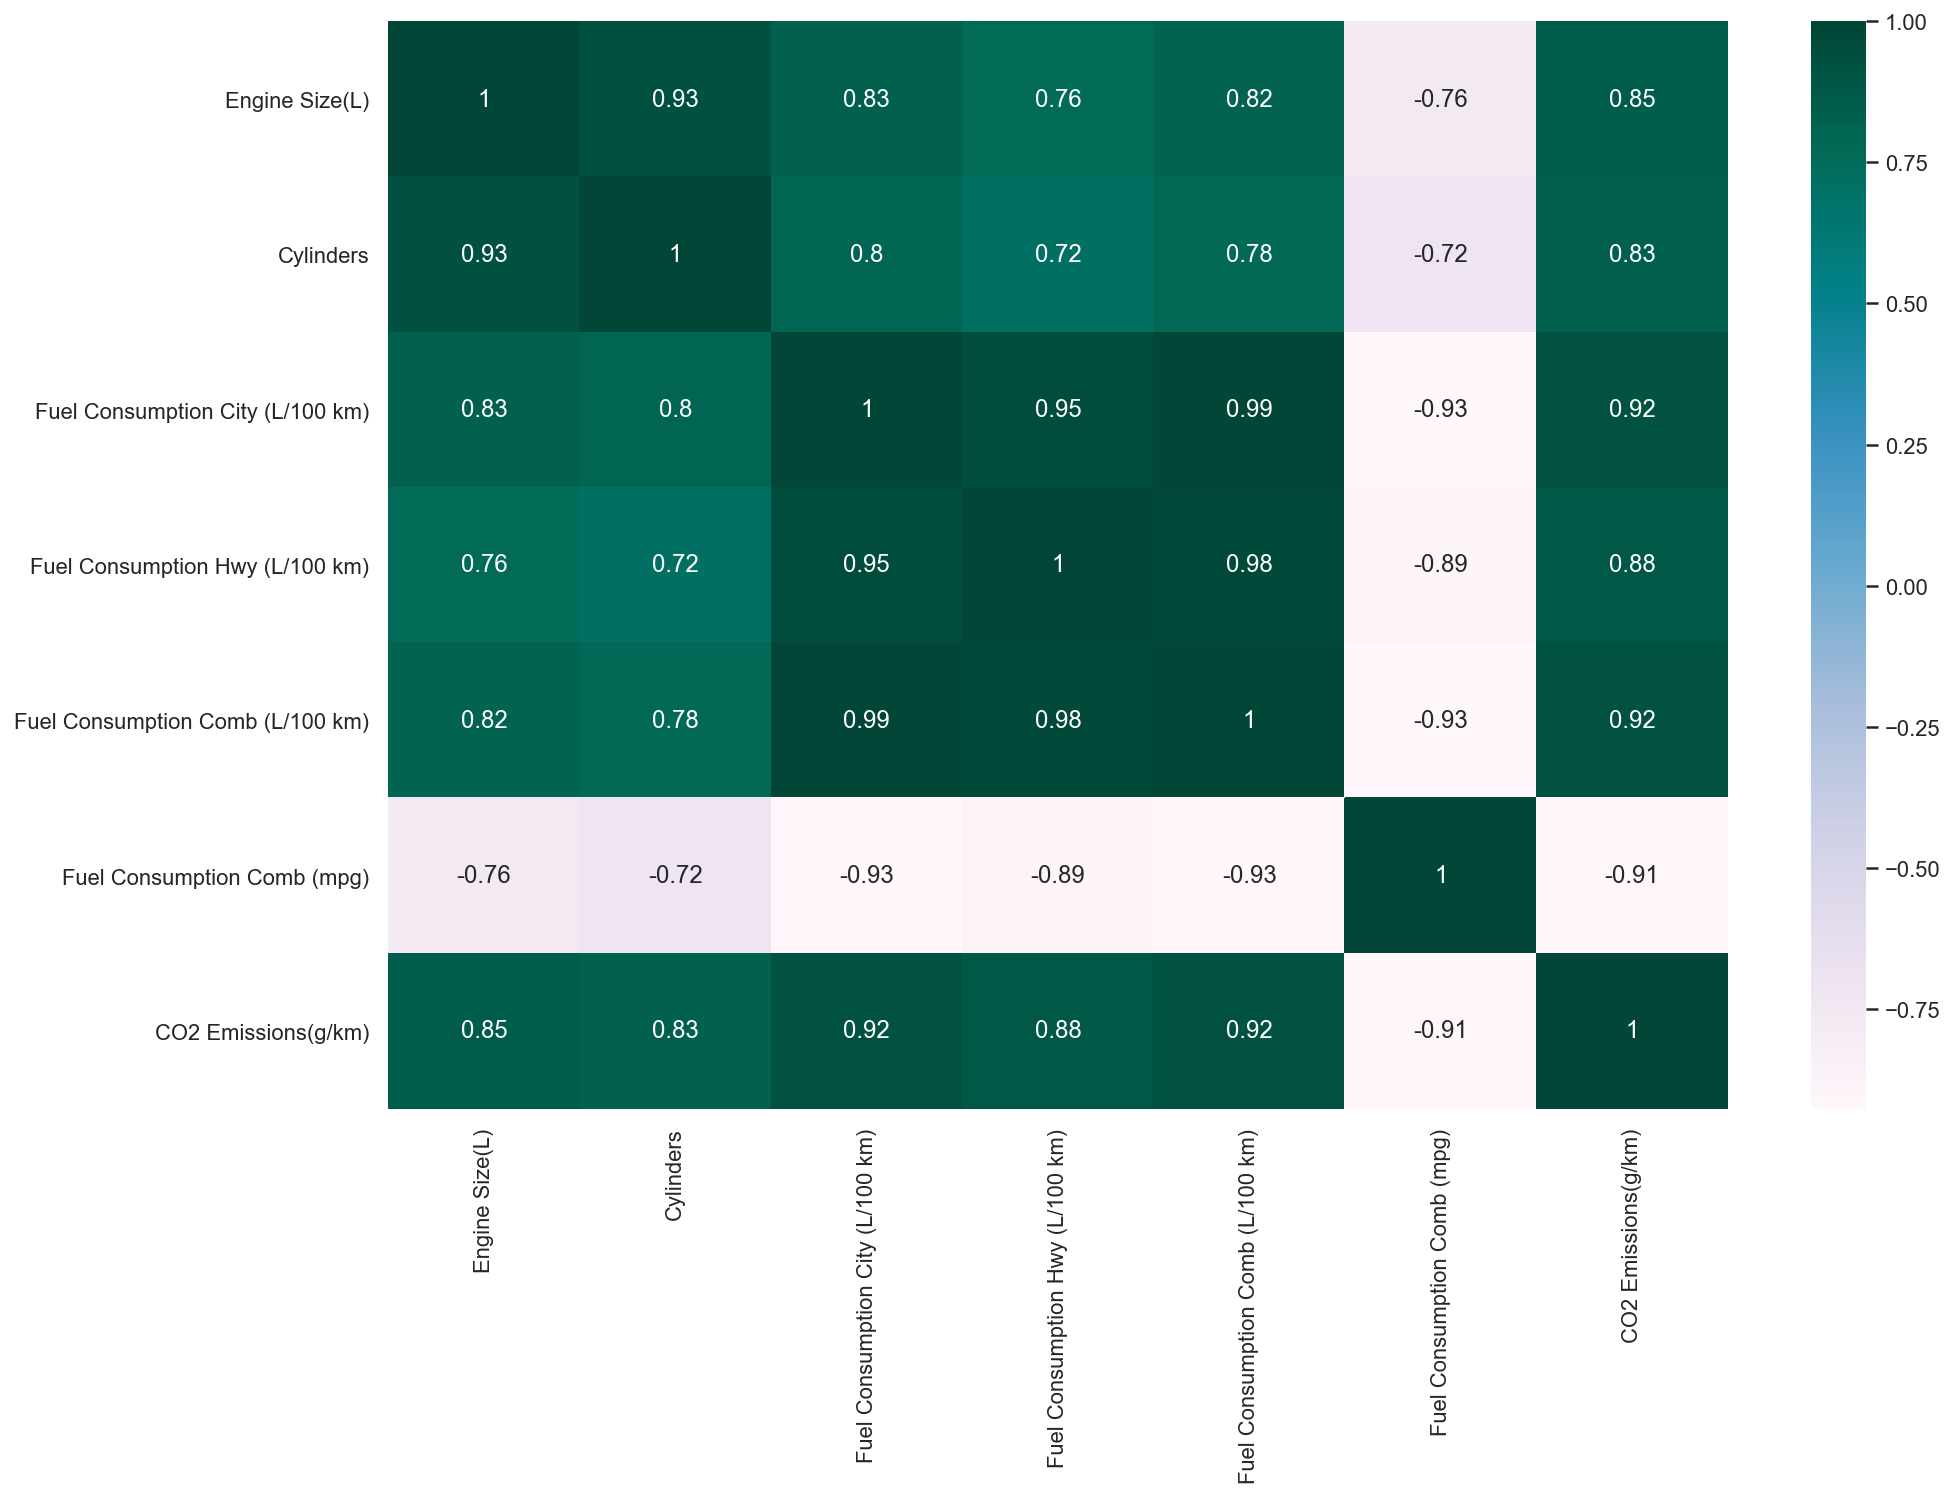

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap="PuBuGn", annot=True);

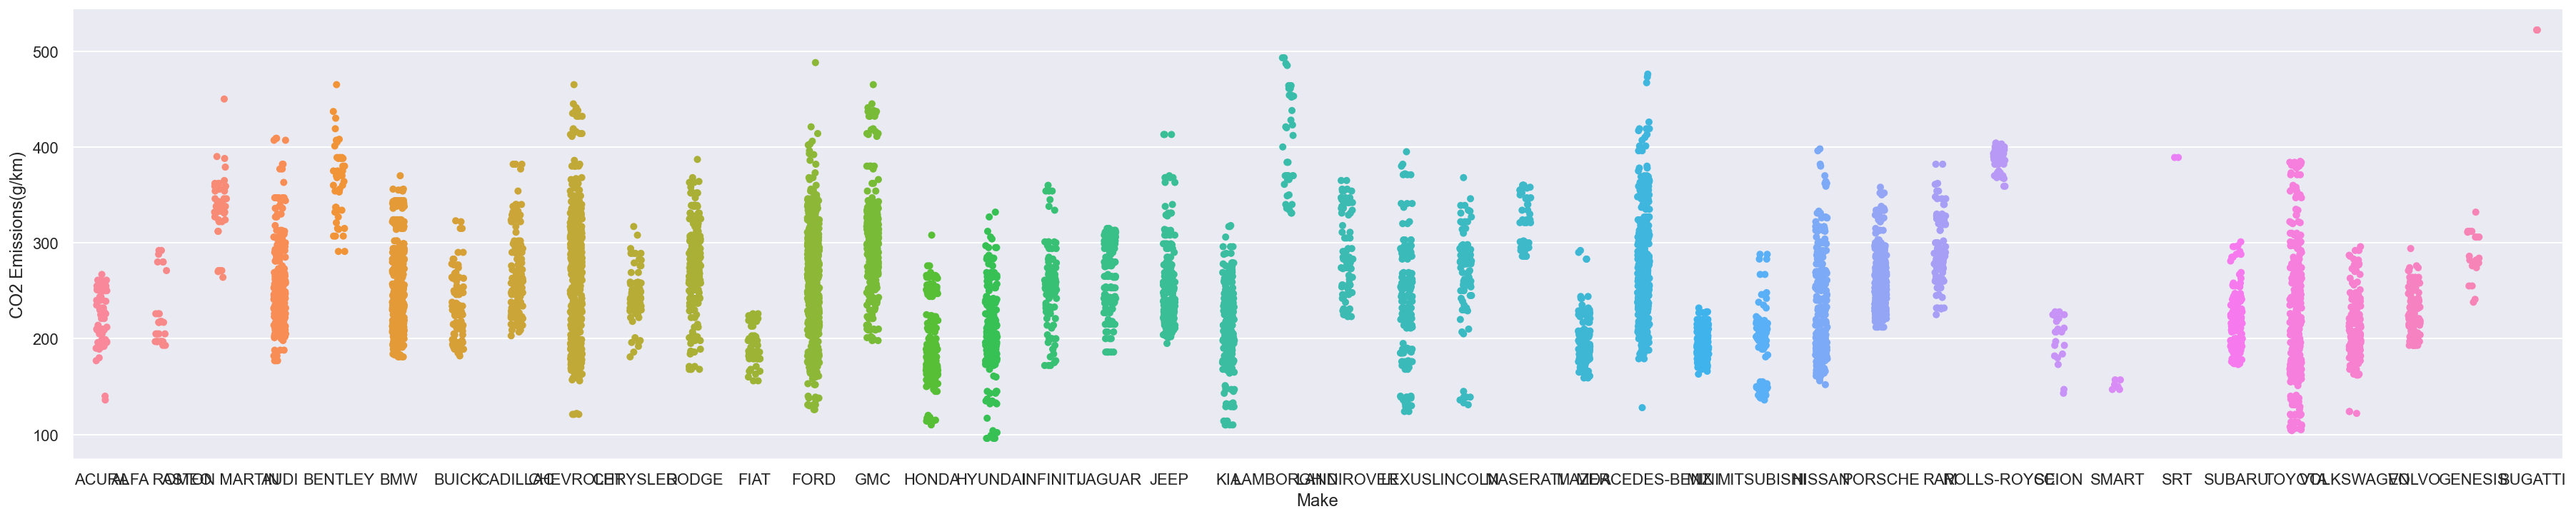

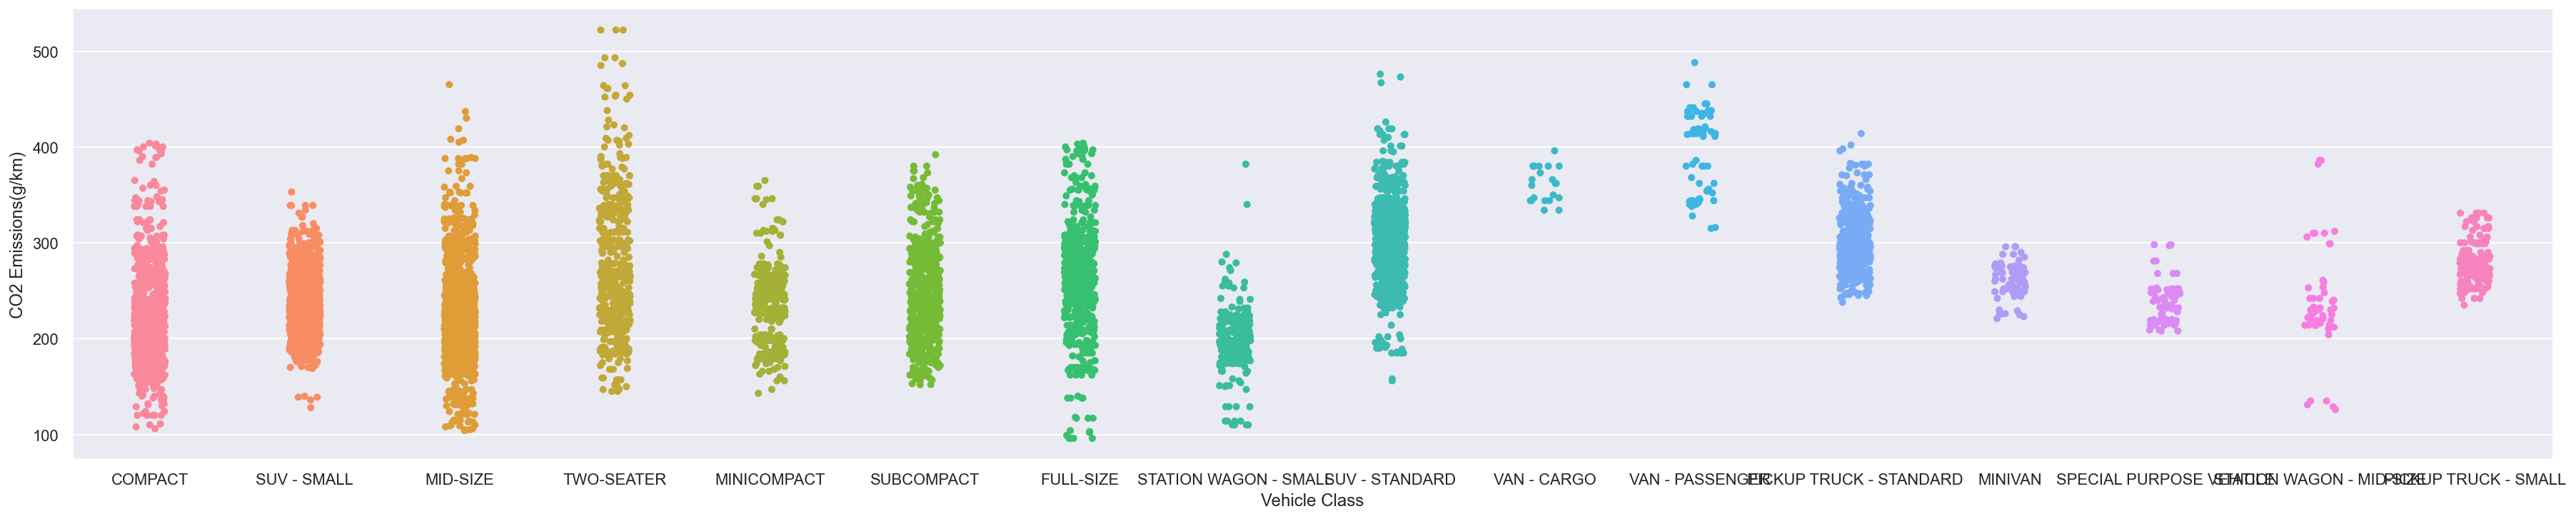

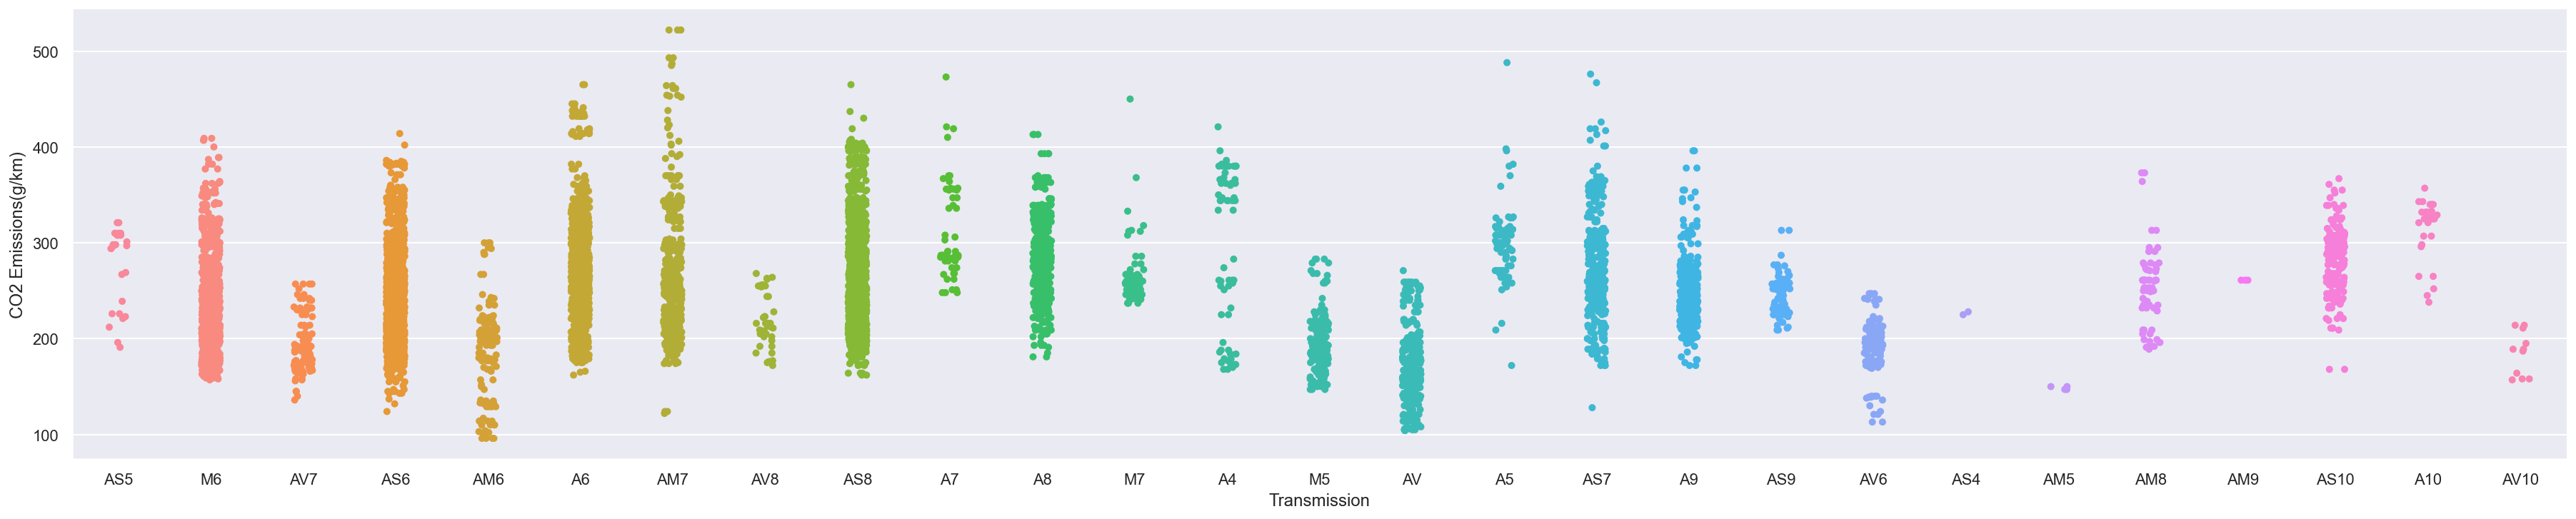

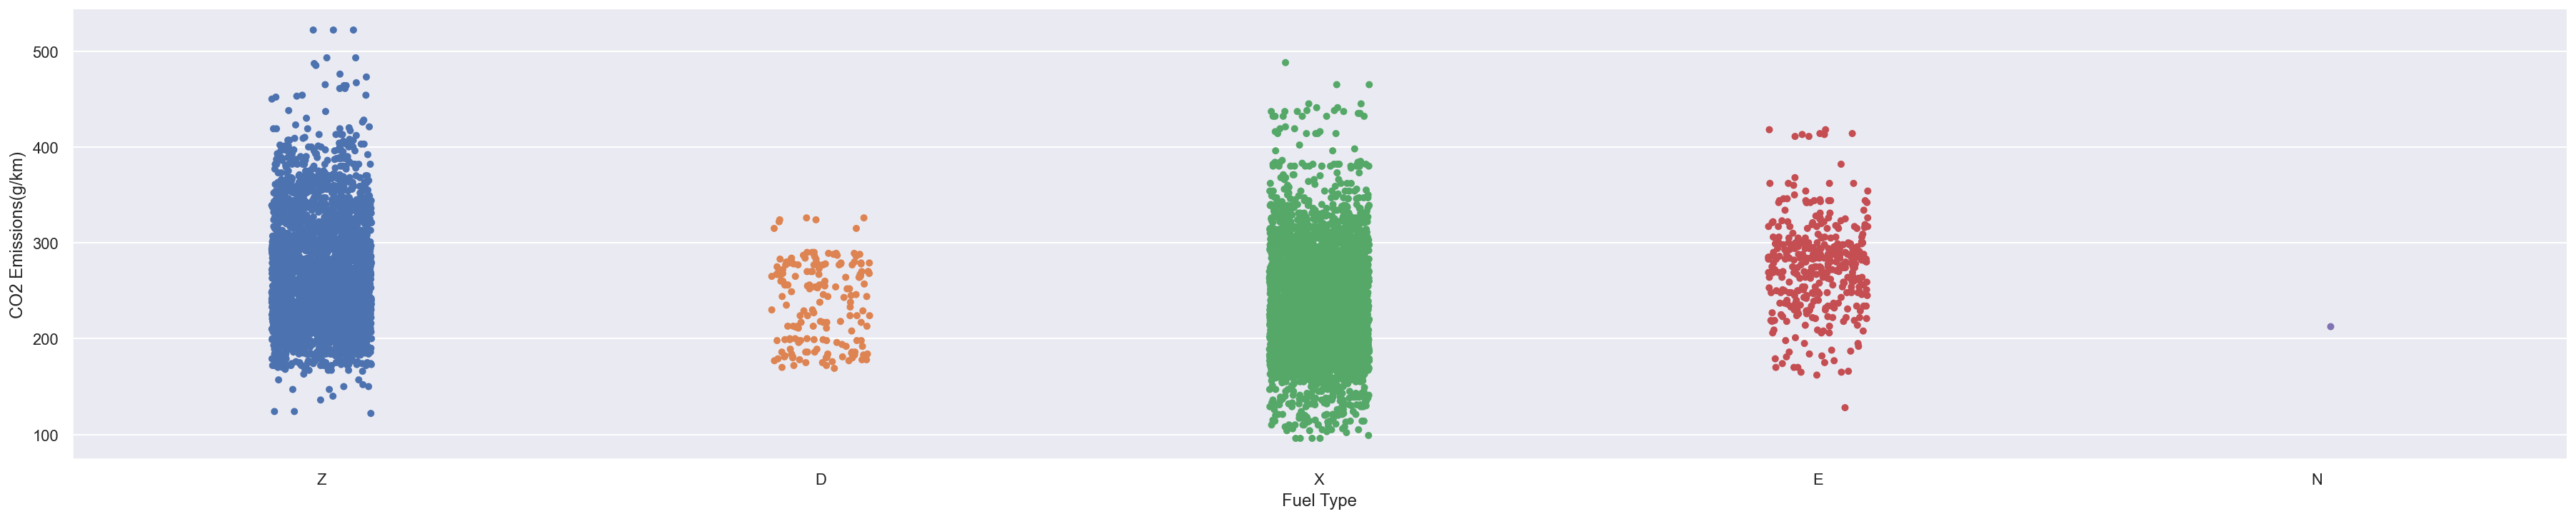

In [117]:
cat_data = data.select_dtypes(exclude=['float64', 'int64'])
col = cat_data.columns
col = col.drop('Model')
for feature in col:
    sns.catplot(x=feature, y='CO2 Emissions(g/km)', data=data, aspect=5)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

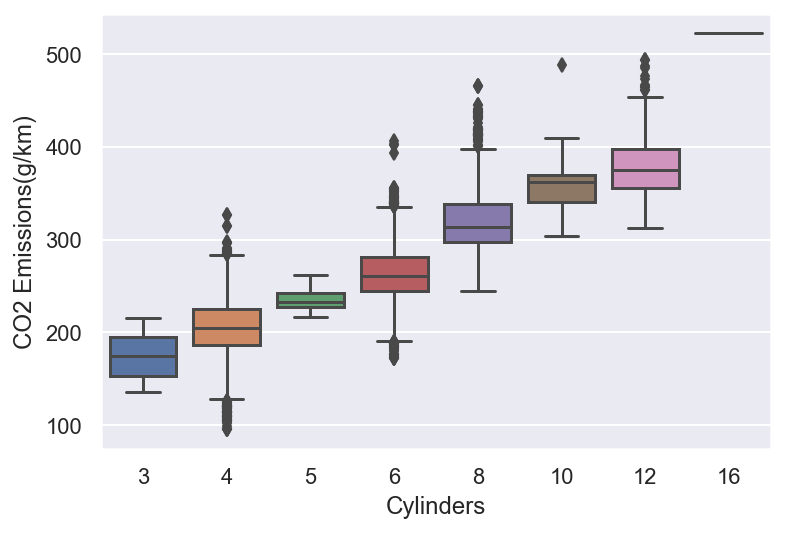

In [33]:
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data)

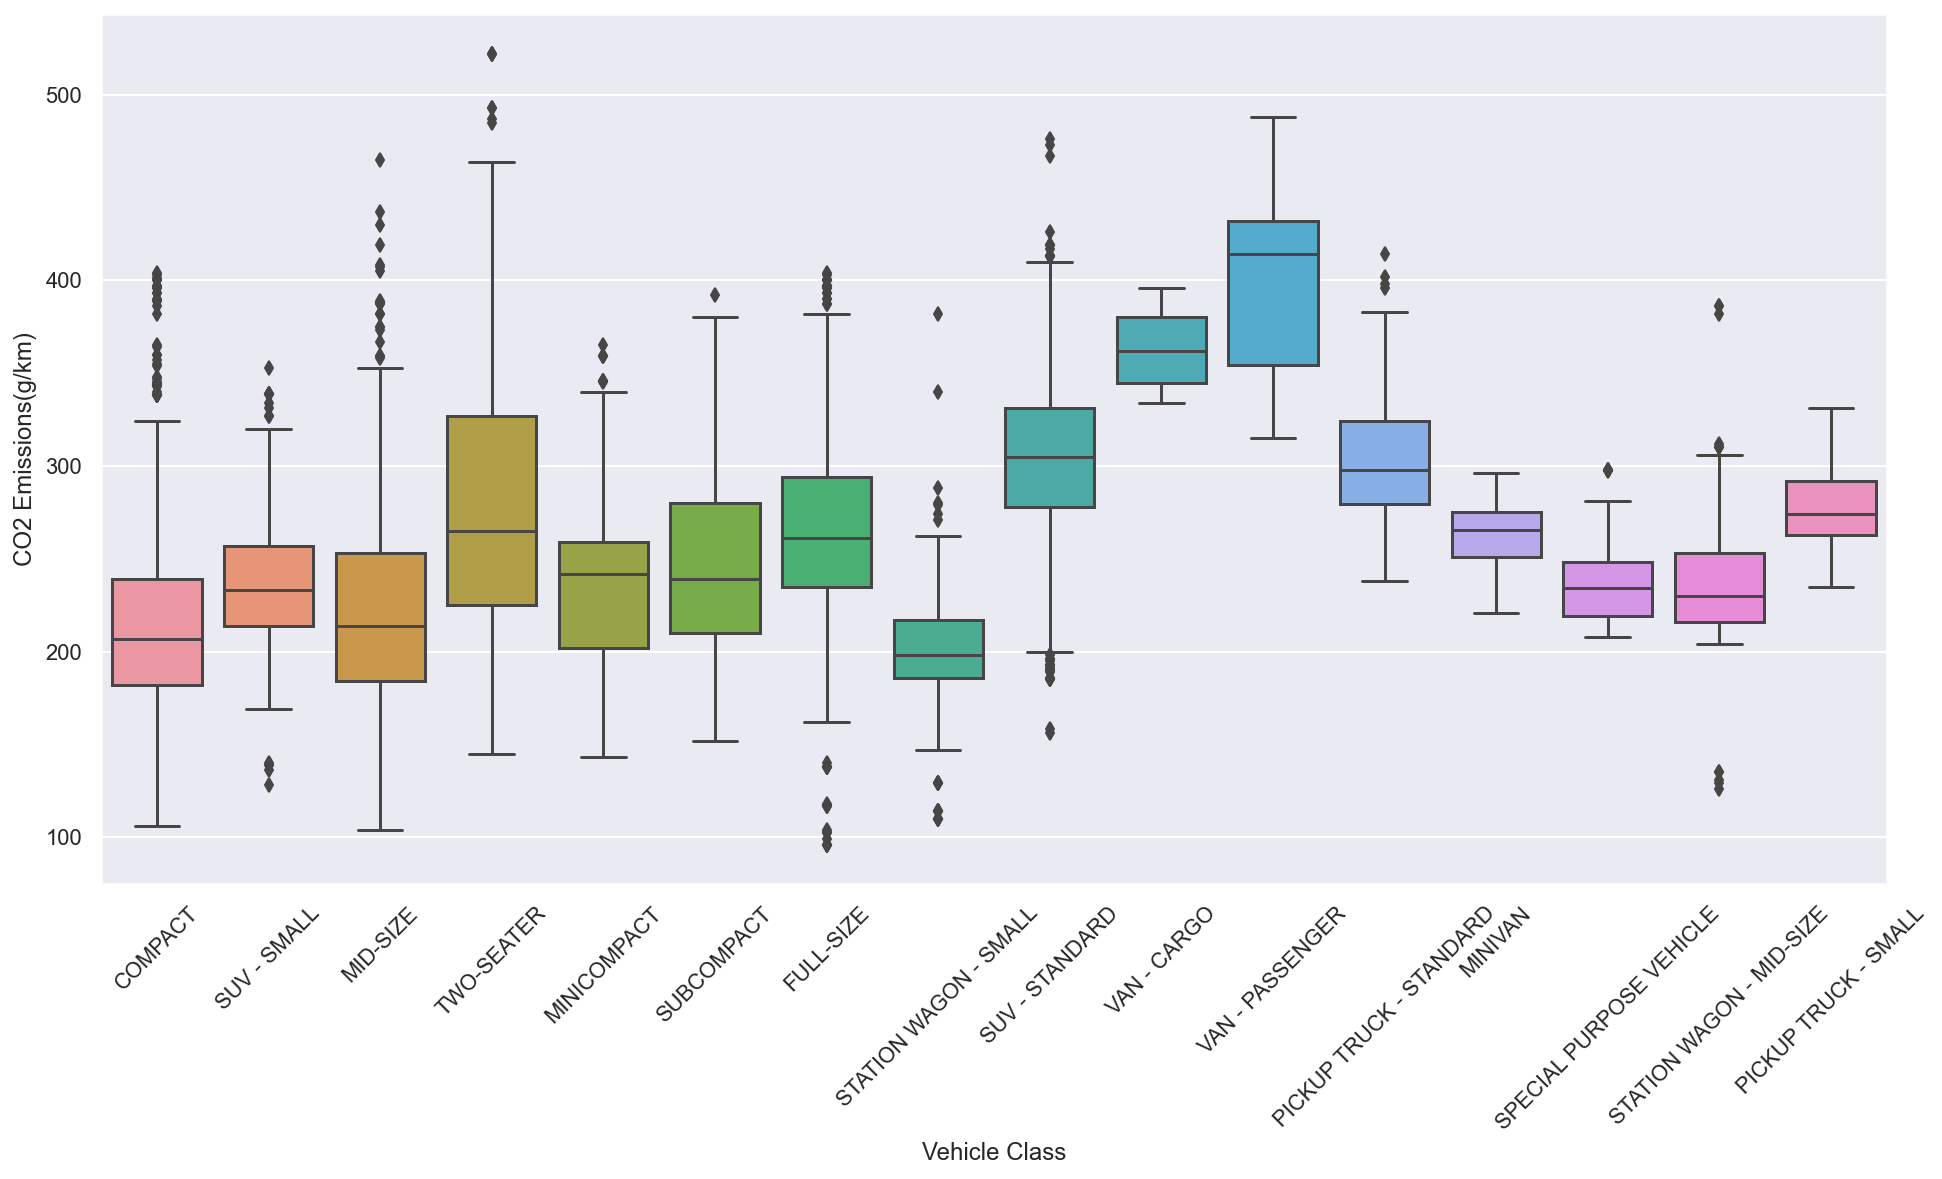

In [43]:
plt.figure(figsize=(16,8))
g = sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45);

## num data

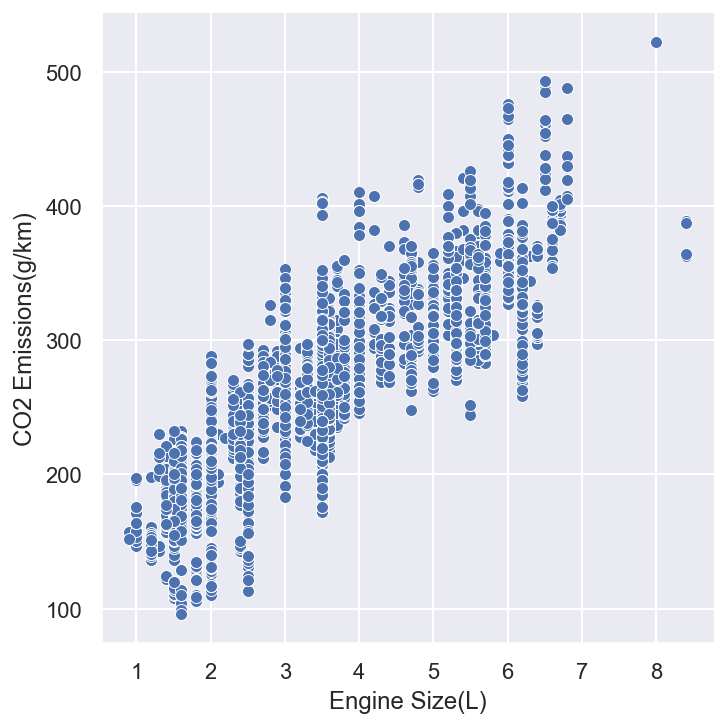

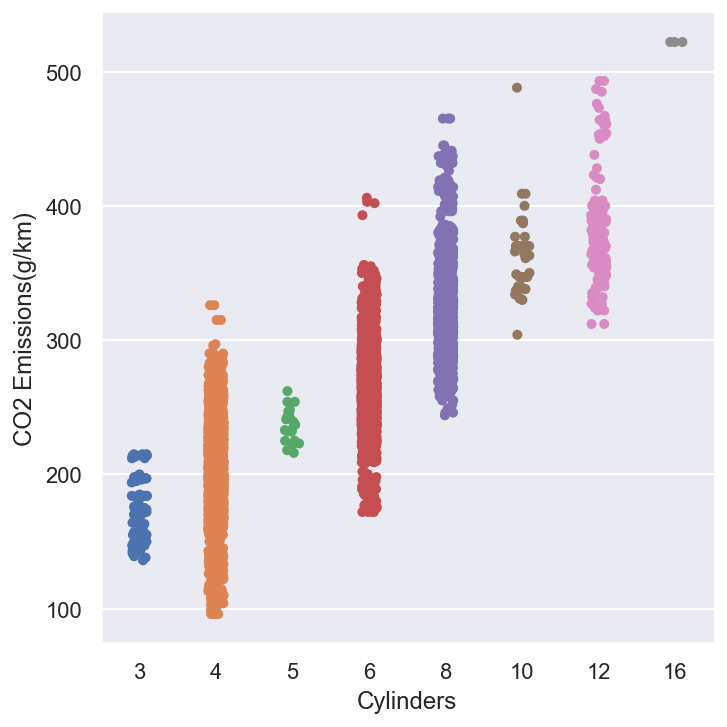

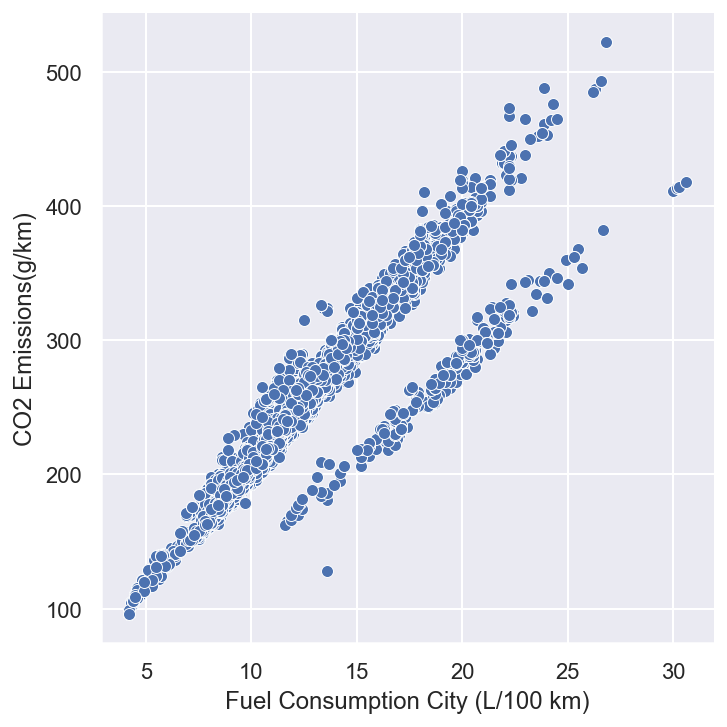

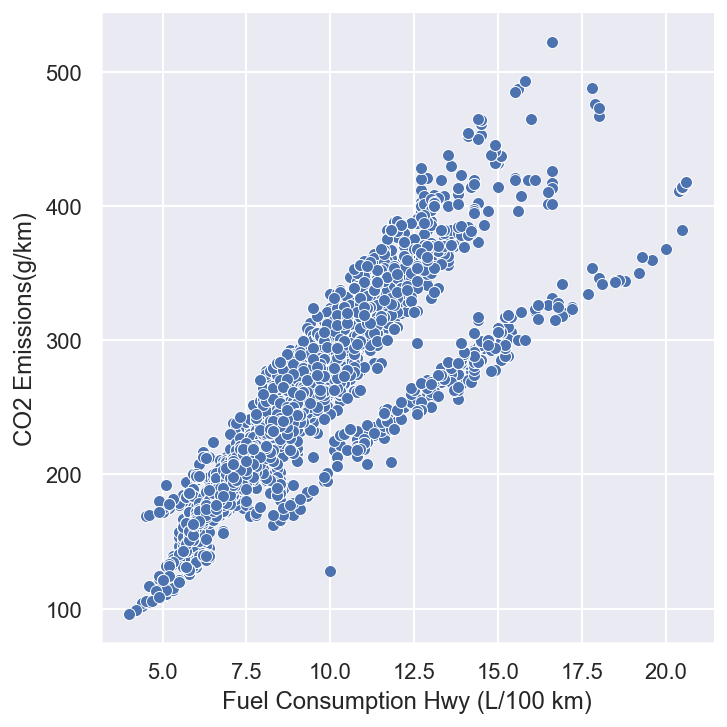

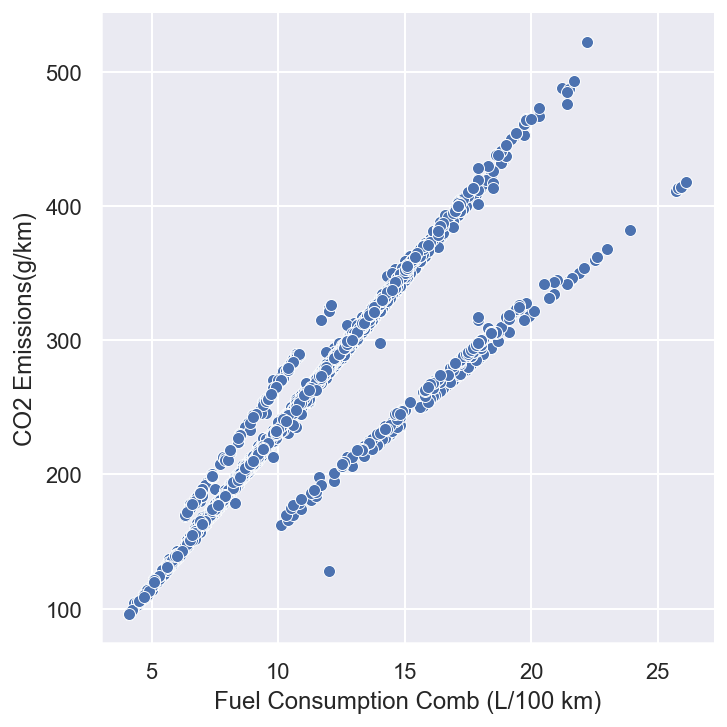

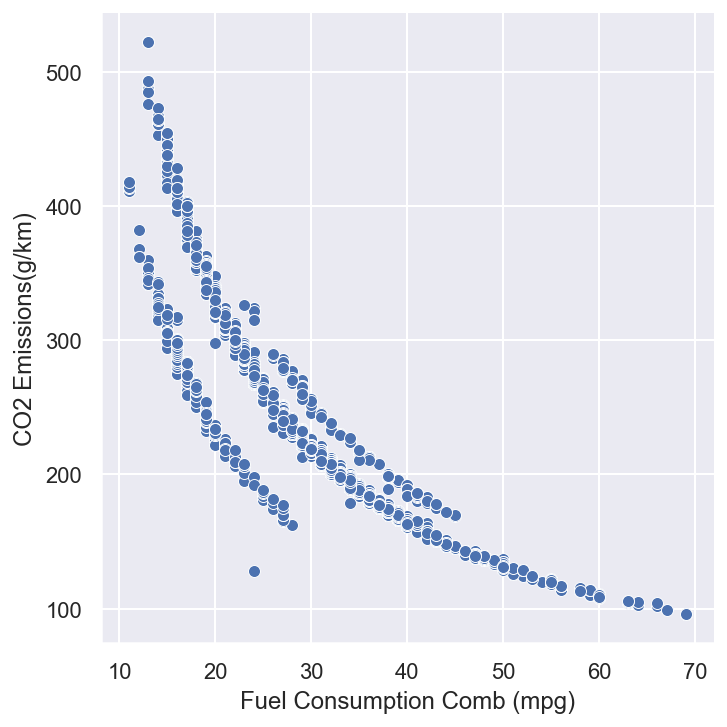

In [44]:
num_data = data.select_dtypes(include=['float64', 'int64'])
num_data = num_data.drop('CO2 Emissions(g/km)', axis=1)
col = num_data.columns
n_un = num_data.nunique()

for id, feature in enumerate(col):
    if n_un[id] < 30:
        sns.catplot(x=feature, y='CO2 Emissions(g/km)', data=data)
    else:
        sns.relplot(x=feature, y='CO2 Emissions(g/km)', data=data)

## 두 개로 갈린 부분이 있다

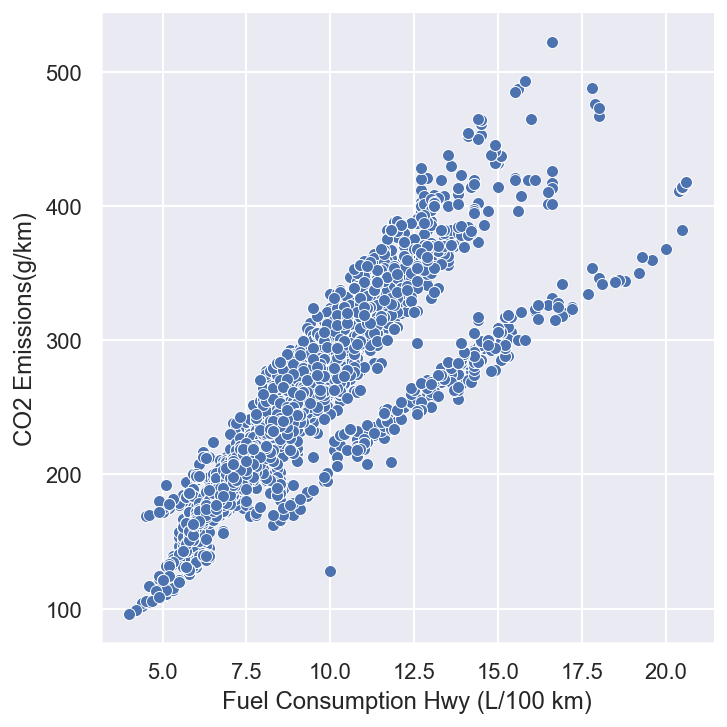

In [48]:
sns.relplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', data=data)

In [51]:
corr_matrix = data.corr()
corr_matrix['CO2 Emissions(g/km)'].sort_values(ascending=False)

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Hwy (L/100 km)     0.883536
Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Consumption Comb (mpg)        -0.907426
Name: CO2 Emissions(g/km), dtype: float64

In [53]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [58]:
data_reg = data.drop(columns=['Make','Model'])
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle Class                     7385 non-null   object 
 1   Engine Size(L)                    7385 non-null   float64
 2   Cylinders                         7385 non-null   int64  
 3   Transmission                      7385 non-null   object 
 4   Fuel Type                         7385 non-null   object 
 5   Fuel Consumption City (L/100 km)  7385 non-null   float64
 6   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 9   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 577.1+ KB


In [75]:
data_with_dummies = data_reg.copy()

col_to_1hot = ['Vehicle Class','Transmission','Fuel Type','Cylinders']
prfix_1hot = ['V-Cls', 'Trans', 'Fl-T','Cyl']

for col, pfx in zip(col_to_1hot, prfix_1hot):
    fuel_1hot = pd.get_dummies(data_reg[col], prefix=pfx, drop_first=True)
    data_with_dummies = data_with_dummies.join(fuel_1hot)

In [76]:
data_with_dummies.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),...,Fl-T_N,Fl-T_X,Fl-T_Z,Cyl_4,Cyl_5,Cyl_6,Cyl_8,Cyl_10,Cyl_12,Cyl_16
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,...,0,0,1,1,0,0,0,0,0,0
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,...,0,0,1,1,0,0,0,0,0,0
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,...,0,0,1,1,0,0,0,0,0,0
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,...,0,0,1,0,0,1,0,0,0,0
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,...,0,0,1,0,0,1,0,0,0,0


In [79]:
col_to_drop = col_to_1hot + ['CO2 Emissions(g/km)']
labels = data_with_dummies['CO2 Emissions(g/km)']
final_data = data_with_dummies.drop(col_to_drop, axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Fuel Consumption City (L/100 km)  7385 non-null   float64
 2   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 3   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 4   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 5   V-Cls_FULL-SIZE                   7385 non-null   uint8  
 6   V-Cls_MID-SIZE                    7385 non-null   uint8  
 7   V-Cls_MINICOMPACT                 7385 non-null   uint8  
 8   V-Cls_MINIVAN                     7385 non-null   uint8  
 9   V-Cls_PICKUP TRUCK - SMALL        7385 non-null   uint8  
 10  V-Cls_PICKUP TRUCK - STANDARD     7385 non-null   uint8  
 11  V-Cls_SPECIAL PURPOSE VEHICLE     7385 non-null   uint8  
 12  V-Cls_

## Regression

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [124]:
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size=0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred_tr = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.737443359066909
RMSE of Test Data :  4.698992548166578


In [125]:
lin_reg.score(X_test,y_test)

0.9931729724310766

In [126]:
lin_reg.score(X_train,y_train)

0.993532796370605

## 모델평가 - RMSE 

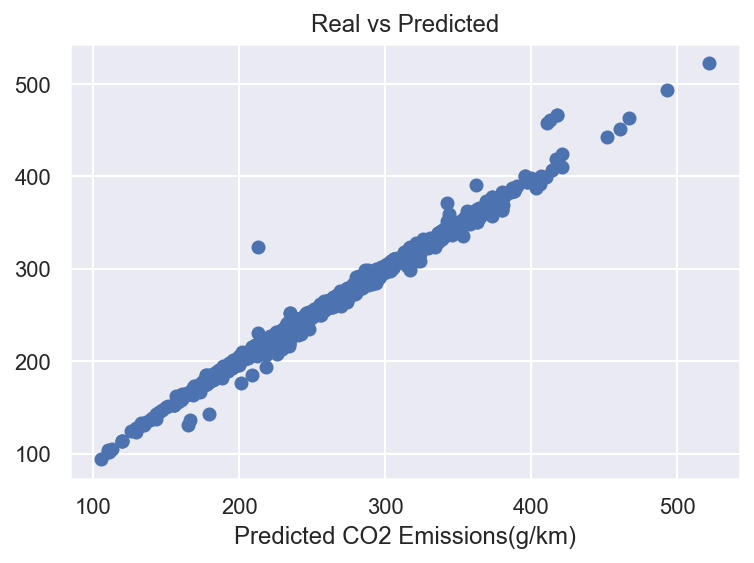

In [86]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual CO2 Emissions(g/km)')
plt.xlabel('Predicted CO2 Emissions(g/km)')
plt.title('Real vs Predicted')
plt.show()

In [91]:
final_data2 = final_data.drop(['Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Consumption City (L/100 km)'], axis=1)
final_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Engine Size(L)                  7385 non-null   float64
 1   V-Cls_FULL-SIZE                 7385 non-null   uint8  
 2   V-Cls_MID-SIZE                  7385 non-null   uint8  
 3   V-Cls_MINICOMPACT               7385 non-null   uint8  
 4   V-Cls_MINIVAN                   7385 non-null   uint8  
 5   V-Cls_PICKUP TRUCK - SMALL      7385 non-null   uint8  
 6   V-Cls_PICKUP TRUCK - STANDARD   7385 non-null   uint8  
 7   V-Cls_SPECIAL PURPOSE VEHICLE   7385 non-null   uint8  
 8   V-Cls_STATION WAGON - MID-SIZE  7385 non-null   uint8  
 9   V-Cls_STATION WAGON - SMALL     7385 non-null   uint8  
 10  V-Cls_SUBCOMPACT                7385 non-null   uint8  
 11  V-Cls_SUV - SMALL               7385 non-null   uint8  
 12  V-Cls_SUV - STANDARD            73

In [127]:
X_train, X_test, y_train, y_test = train_test_split(final_data2, labels, test_size=0.2, random_state=15)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train)

pred_tr = lin_reg2.predict(X_train)
pred_test = lin_reg2.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  22.198630057191483
RMSE of Test Data :  22.857737632652853


In [128]:
lin_reg2.score(X_test,y_test)

0.8492322270770211

In [129]:
lin_reg2.score(X_train,y_train)

0.8555217498939712

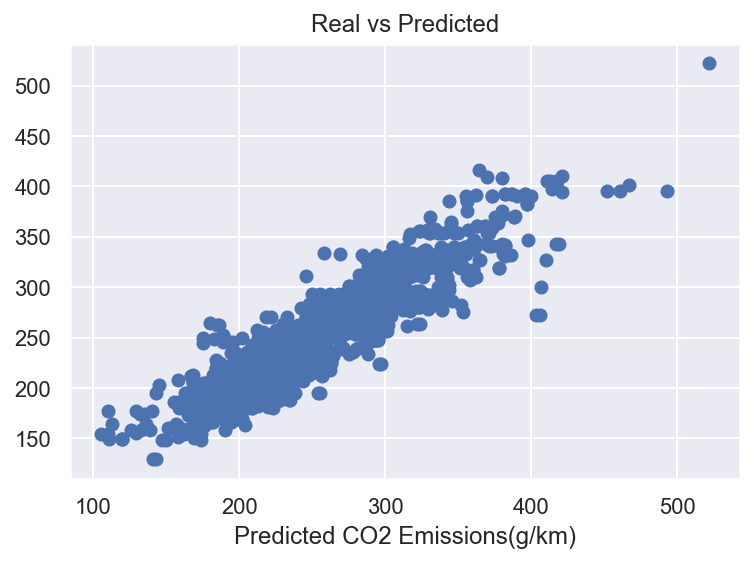

In [96]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual CO2 Emissions(g/km)')
plt.xlabel('Predicted CO2 Emissions(g/km)')
plt.title('Real vs Predicted')
plt.show()

## OLS

In [132]:
import statsmodels.api as sm

# 상수항 추가
final_data_c = sm.add_constant(final_data2, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.855
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     813.0
Date:                 Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                         14:30:33   Log-Likelihood:                -33410.
No. Observations:                 7385   AIC:                         6.693e+04
Df Residuals:                     7331   BIC:                         6.730e+04
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

## 일부 데이터를 빼서 다시 OLS

In [135]:
high_p = ['V-Cls_MID-SIZE', 'Trans_AM5', 'Fl-T_X', 'Trans_AV']

data_ols = final_data2.drop(columns=high_p)
    
# 상수항 추가
final_data_c = sm.add_constant(data_ols, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.855
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     879.6
Date:                 Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                         16:36:24   Log-Likelihood:                -33410.
No. Observations:                 7385   AIC:                         6.692e+04
Df Residuals:                     7335   BIC:                         6.727e+04
Df Model:                           49                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

## KN regressor

In [102]:
X_train, X_test, y_train, y_test = train_test_split(final_data2, labels, test_size=0.2, random_state=15)

kn_reg = KNeighborsRegressor()
kn_reg.fit(X_train, y_train)

kn_pred_tr = kn_reg.predict(X_train)
kn_pred_test = kn_reg.predict(X_test)

kn_rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
kn_rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', kn_rmse_tr)
print('RMSE of Test Data : ', kn_rmse_test)

RMSE of Train Data :  22.198630057191483
RMSE of Test Data :  22.857737632652853


In [103]:
kn_reg.score(X_test,y_test)

0.9068044890733522

In [104]:
kn_reg.score(X_train,y_train)

0.9334838298677568

## Decision Tree Regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
X_train, X_test, y_train, y_test = train_test_split(final_data2, labels, test_size=0.2, random_state=15)

tree_reg = DecisionTreeRegressor(random_state=8)
tree_reg.fit(X_train, y_train)

tree_pred_tr = tree_reg.predict(X_train)
tree_pred_test = tree_reg.predict(X_test)

tree_rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
tree_rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', tree_rmse_tr)
print('RMSE of Test Data : ', tree_rmse_test)

RMSE of Train Data :  22.198630057191483
RMSE of Test Data :  22.857737632652853


In [107]:
tree_reg.score(X_test,y_test)

0.92929679120326

In [108]:
tree_reg.score(X_train,y_train)

0.9535740515861268

### randomforest

In [298]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_trans = RandomForestRegressor(n_estimators=100, random_state=13)
forest_reg_trans.fit(X_train, y_train)

forest_pred_tr = forest_reg_trans.predict(X_train)
forest_pred_test = forest_reg_trans.predict(X_test)

forest_rmse_tr = (np.sqrt(mean_squared_error(y_train, forest_pred_tr)))
forest_rmse_test = (np.sqrt(mean_squared_error(y_test, forest_pred_test)))

print('RMSE of Train Data : ', forest_rmse_tr)
print('RMSE of Test Data : ', forest_rmse_test)

RMSE of Train Data :  27.87262310406525
RMSE of Test Data :  27.884074297526915


In [299]:
print('train score: ', forest_reg_trans.score(X_train, y_train), 'test score: ', forest_reg_trans.score(X_test, y_test))

train score:  0.772225128620067 test score:  0.775635317460213


## 변속기와 실린더로 co2 emission을 추정할 수 있을까?

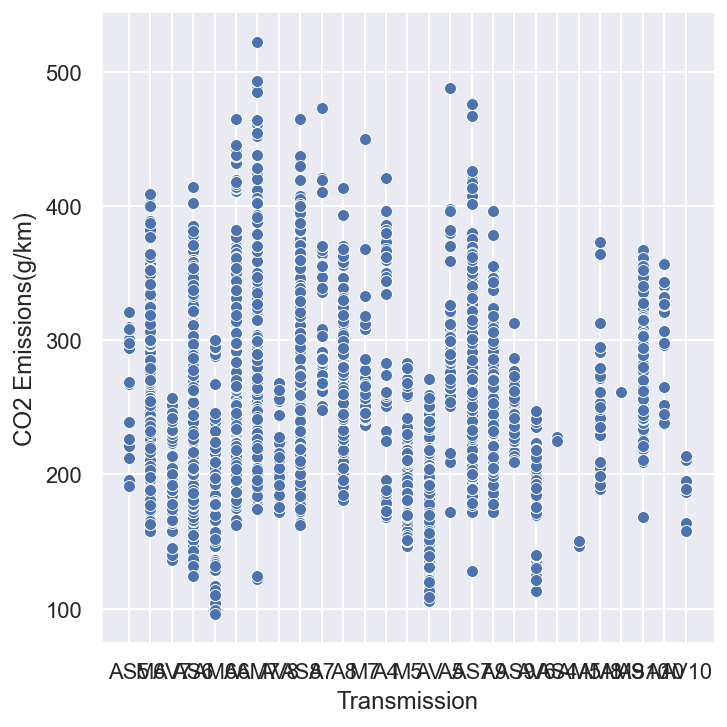

In [235]:
sns.relplot(x='Transmission', y='CO2 Emissions(g/km)', data=data)

In [300]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [273]:
def GetTransNum(s):
    try: 
        int(s[-2:])
        return s[-2:]
    except ValueError:
        try:
            int(s[-1])
            return s[-1]
        except ValueError:
            return '6'

In [261]:
GetTransNum('AV')

'8'

In [272]:
data_trans.describe()

,Trans_val,Trans_type
count,7385,7385
unique,7,5
top,6,AS
freq,3259,3127


In [186]:
list(map(lambda s : s.split(s[-1])[0] , data['Transmission'].values))

['AS',
 'M',
 'AV',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'M',
 'AS',
 'M',
 'AS',
 'AM',
 'A',
 'A',
 'AM',
 'M',
 'AM',
 'M',
 'A',
 'AV',
 'AS',
 'M',
 'AS',
 'AS',
 'M',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'A',
 'M',
 'A',
 'M',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'AS',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'A',
 'AS',
 'AS',
 'A',
 'A',
 'A',
 'A',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'A',
 'M',
 'A',
 'A',
 'A',
 'A',
 'M',
 'A',
 'A',
 'A',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'M',
 'A',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'AM',
 'M',
 'AM',
 'M',
 'AM',
 'M',
 'AM',
 'M',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'M',
 'AM',
 'M',
 'AM',
 'A',
 'A',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'M',
 'AS',
 'AS',
 'AS',
 'M',
 'AS',
 

In [183]:
list(s[-1] for s in data['Transmission'].values)

['5',
 '6',
 '7',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '5',
 '6',
 '5',
 '6',
 '6',
 '6',
 '7',
 '6',
 '7',
 '6',
 '6',
 '8',
 '8',
 '6',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '7',
 '8',
 '7',
 '6',
 '7',
 '6',
 '7',
 '7',
 '7',
 '8',
 '8',
 '6',
 '6',
 '6',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '6',
 '8',
 '8',
 '6',
 '8',
 '8',
 '6',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '6',
 '7',
 '6',
 '7',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '8',
 '6'

In [274]:
data_trans = data.copy()
data_trans['Trans_val'] = list(map(lambda s: GetTransNum(s),data['Transmission'].values))
data_trans['Trans_type'] = list(map(lambda s : s.split(GetTransNum(s))[0] , data['Transmission'].values))
data_trans = data_trans[['Trans_val', 'Trans_type']]
data_trans.head()

,Trans_val,Trans_type
0,5,AS
1,6,M
2,7,AV
3,6,AS
4,6,AS


In [275]:
data_trans.Trans_type.unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [279]:
data_trans.Trans_val.unique()

array([ 5,  6,  7,  8,  4,  9, 10])

In [277]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Trans_val   7385 non-null   object
 1   Trans_type  7385 non-null   object
dtypes: object(2)
memory usage: 115.5+ KB


In [278]:
data_trans['Trans_val'] = data_trans['Trans_val'].astype('int')

### encoding

In [280]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_trans_type = data_trans['Trans_type'].to_numpy().reshape(-1, 1)
data_trans_1hot = cat_encoder.fit_transform(data_trans_type)
data_trans_1hot

<7385x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7385 stored elements in Compressed Sparse Row format>

In [281]:
data_trans_array = data_trans_1hot.toarray()
data_trans_array.shape

(7385, 5)

In [282]:
list(data_trans['Trans_type'].unique())

['AS', 'M', 'AV', 'AM', 'A']

In [283]:
data_trans[list(data_trans['Trans_type'].unique())] = data_trans_array

In [284]:
data_trans.head()

,Trans_val,Trans_type,AS,M,AV,AM,A
0,5,AS,0.0,0.0,1.0,0.0,0.0
1,6,M,0.0,0.0,0.0,0.0,1.0
2,7,AV,0.0,0.0,0.0,1.0,0.0
3,6,AS,0.0,0.0,1.0,0.0,0.0
4,6,AS,0.0,0.0,1.0,0.0,0.0


In [285]:
data_trans_final = data_trans.drop(columns='Trans_type')
data_trans_final.head()

,Trans_val,AS,M,AV,AM,A
0,5,0.0,0.0,1.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,1.0
2,7,0.0,0.0,0.0,1.0,0.0
3,6,0.0,0.0,1.0,0.0,0.0
4,6,0.0,0.0,1.0,0.0,0.0


In [287]:
data_trans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 346.3 KB


In [288]:
data_trans_f2 = data_trans_final.copy()
data_trans_f2['label'] = data['CO2 Emissions(g/km)']
data_trans_f2

,Trans_val,AS,M,AV,AM,A,label
0,5,0.0,0.0,1.0,0.0,0.0,196
1,6,0.0,0.0,0.0,0.0,1.0,221
2,7,0.0,0.0,0.0,1.0,0.0,136
3,6,0.0,0.0,1.0,0.0,0.0,255
4,6,0.0,0.0,1.0,0.0,0.0,244
...,...,...,...,...,...,...,...
7380,8,0.0,0.0,1.0,0.0,0.0,219
7381,8,0.0,0.0,1.0,0.0,0.0,232
7382,8,0.0,0.0,1.0,0.0,0.0,240
7383,8,0.0,0.0,1.0,0.0,0.0,232


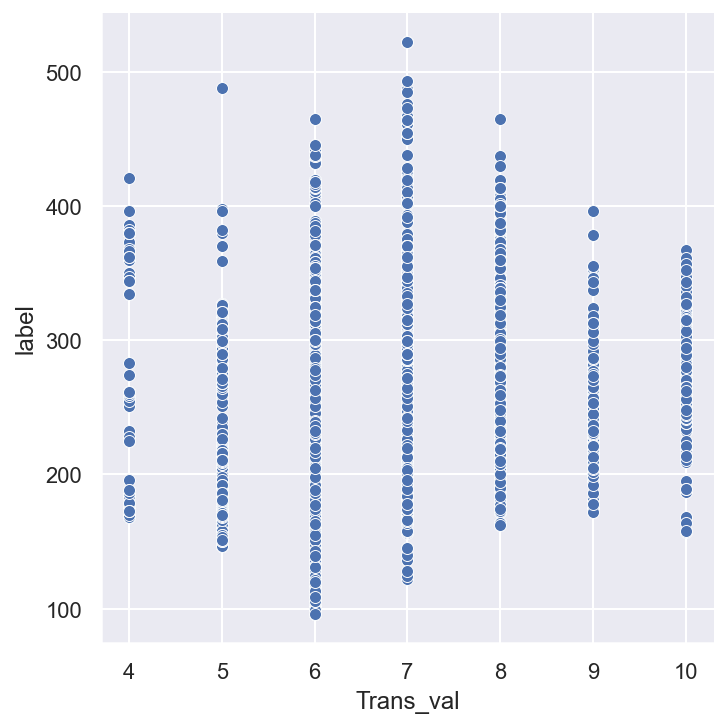

In [289]:
sns.relplot(x='Trans_val', y='label', data=data_trans_f2)

### 실린더 추가

In [291]:
data_trans_final['Cylinders'] = data['Cylinders']
data_trans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 404.0 KB


### OLS

In [292]:
# 상수항 추가
final_data_c = sm.add_constant(data_trans_final, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.729
Model:                             OLS   Adj. R-squared:                  0.729
Method:                  Least Squares   F-statistic:                     3309.
Date:                 Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:05:31   Log-Likelihood:                -35707.
No. Observations:                 7385   AIC:                         7.143e+04
Df Residuals:                     7378   BIC:                         7.148e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.3617      1.924     50.60

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    data_trans_final.values, i) for i in range(data_trans_final.shape[1])]
vif["features"] = data_trans_final.columns
vif

,VIF Factor,features
0,1.202714,Trans_val
1,12.852041,AS
2,4.869879,M
3,20.750370,AV
4,3.800784,AM
5,6.152791,A
6,1.151204,Cylinders


### linear Regression

In [295]:
X_train, X_test, y_train, y_test = train_test_split(data_trans_final, labels, test_size=0.2, random_state=15)

lin_reg_trans2 = LinearRegression()
lin_reg_trans2.fit(X_train, y_train)

pred_tr = lin_reg_trans2.predict(X_train)
pred_test = lin_reg_trans2.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  30.531334760826166
RMSE of Test Data :  30.19848049713175


In [296]:
lin_reg_trans2.score(X_train, y_train)

0.7266986935706093

In [297]:
lin_reg_trans2.score(X_test, y_test)

0.7368446432924975

## 추정이 가능하다

## 2.결측치 변환 = 8

In [311]:
def GetTransNum(s):
    try: 
        int(s[-2:])
        return s[-2:]
    except ValueError:
        try:
            int(s[-1])
            return s[-1]
        except ValueError:
            return '8'

In [312]:
GetTransNum('AV')

'8'

In [313]:
data_trans.describe()

,Trans_val,AS,M,AV,AM,A
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,6.851185,0.250643,0.087475,0.423426,0.077996,0.160460
std,1.197542,0.433413,0.282548,0.494135,0.268183,0.367057
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
list(map(lambda s : s.split(s[-1])[0] , data['Transmission'].values))

['AS',
 'M',
 'AV',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'M',
 'AS',
 'M',
 'AS',
 'AM',
 'A',
 'A',
 'AM',
 'M',
 'AM',
 'M',
 'A',
 'AV',
 'AS',
 'M',
 'AS',
 'AS',
 'M',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'A',
 'M',
 'A',
 'M',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'AS',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'A',
 'AS',
 'AS',
 'A',
 'A',
 'A',
 'A',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'A',
 'M',
 'A',
 'A',
 'A',
 'A',
 'M',
 'A',
 'A',
 'A',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'M',
 'A',
 'A',
 'M',
 'A',
 'M',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'AM',
 'M',
 'AM',
 'M',
 'AM',
 'M',
 'AM',
 'M',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'M',
 'AM',
 'M',
 'AM',
 'A',
 'A',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'AS',
 'M',
 'AS',
 'AS',
 'AS',
 'M',
 'AS',
 

In [183]:
list(s[-1] for s in data['Transmission'].values)

['5',
 '6',
 '7',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '5',
 '6',
 '5',
 '6',
 '6',
 '6',
 '7',
 '6',
 '7',
 '6',
 '6',
 '8',
 '8',
 '6',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '7',
 '8',
 '7',
 '6',
 '7',
 '6',
 '7',
 '7',
 '7',
 '8',
 '8',
 '6',
 '6',
 '6',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '6',
 '8',
 '8',
 '6',
 '8',
 '8',
 '6',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '8',
 '6',
 '8',
 '8',
 '8',
 '8',
 '6',
 '8',
 '8',
 '8',
 '6',
 '7',
 '6',
 '7',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '8',
 '6'

In [314]:
data_trans = data.copy()
data_trans['Trans_val'] = list(map(lambda s: GetTransNum(s),data['Transmission'].values))
data_trans['Trans_type'] = list(map(lambda s : s.split(GetTransNum(s))[0] , data['Transmission'].values))
data_trans = data_trans[['Trans_val', 'Trans_type']]
data_trans.head()

,Trans_val,Trans_type
0,5,AS
1,6,M
2,7,AV
3,6,AS
4,6,AS


In [315]:
data_trans.Trans_type.unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [316]:
data_trans.Trans_val.unique()

array(['5', '6', '7', '8', '4', '9', '10'], dtype=object)

In [317]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Trans_val   7385 non-null   object
 1   Trans_type  7385 non-null   object
dtypes: object(2)
memory usage: 115.5+ KB


In [318]:
data_trans['Trans_val'] = data_trans['Trans_val'].astype('int')

### encoding

In [319]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_trans_type = data_trans['Trans_type'].to_numpy().reshape(-1, 1)
data_trans_1hot = cat_encoder.fit_transform(data_trans_type)
data_trans_1hot

<7385x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7385 stored elements in Compressed Sparse Row format>

In [320]:
data_trans_array = data_trans_1hot.toarray()
data_trans_array.shape

(7385, 5)

In [321]:
list(data_trans['Trans_type'].unique())

['AS', 'M', 'AV', 'AM', 'A']

In [322]:
data_trans[list(data_trans['Trans_type'].unique())] = data_trans_array

In [323]:
data_trans.head()

,Trans_val,Trans_type,AS,M,AV,AM,A
0,5,AS,0.0,0.0,1.0,0.0,0.0
1,6,M,0.0,0.0,0.0,0.0,1.0
2,7,AV,0.0,0.0,0.0,1.0,0.0
3,6,AS,0.0,0.0,1.0,0.0,0.0
4,6,AS,0.0,0.0,1.0,0.0,0.0


In [324]:
data_trans_final = data_trans.drop(columns='Trans_type')
data_trans_final.head()

,Trans_val,AS,M,AV,AM,A
0,5,0.0,0.0,1.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,1.0
2,7,0.0,0.0,0.0,1.0,0.0
3,6,0.0,0.0,1.0,0.0,0.0
4,6,0.0,0.0,1.0,0.0,0.0


In [325]:
data_trans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 346.3 KB


In [326]:
data_trans_f2 = data_trans_final.copy()
data_trans_f2['label'] = data['CO2 Emissions(g/km)']
data_trans_f2

,Trans_val,AS,M,AV,AM,A,label
0,5,0.0,0.0,1.0,0.0,0.0,196
1,6,0.0,0.0,0.0,0.0,1.0,221
2,7,0.0,0.0,0.0,1.0,0.0,136
3,6,0.0,0.0,1.0,0.0,0.0,255
4,6,0.0,0.0,1.0,0.0,0.0,244
...,...,...,...,...,...,...,...
7380,8,0.0,0.0,1.0,0.0,0.0,219
7381,8,0.0,0.0,1.0,0.0,0.0,232
7382,8,0.0,0.0,1.0,0.0,0.0,240
7383,8,0.0,0.0,1.0,0.0,0.0,232


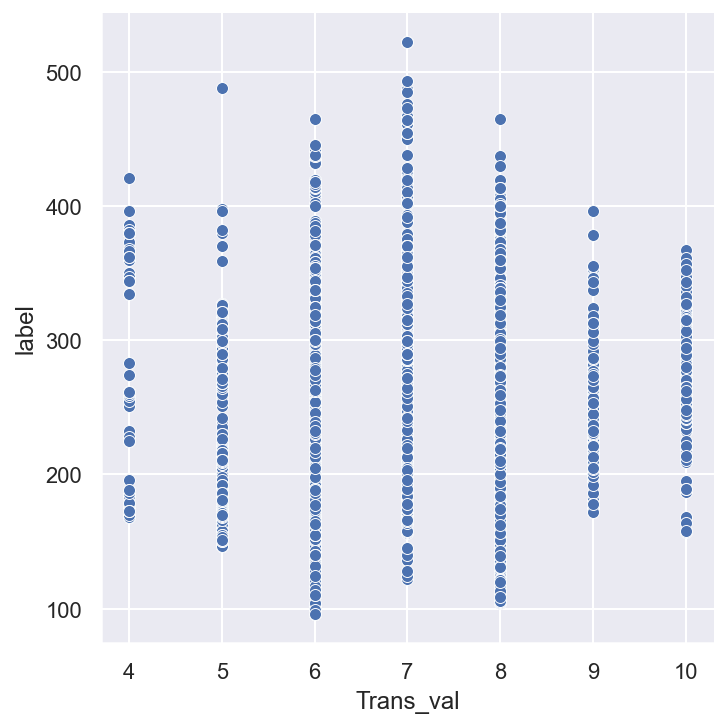

In [327]:
sns.relplot(x='Trans_val', y='label', data=data_trans_f2)

## OLS

In [328]:
# 상수항 추가
final_data_c = sm.add_constant(data_trans_final, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.185
Model:                             OLS   Adj. R-squared:                  0.185
Method:                  Least Squares   F-statistic:                     335.1
Date:                 Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                         10:44:46   Log-Likelihood:                -39774.
No. Observations:                 7385   AIC:                         7.956e+04
Df Residuals:                     7379   BIC:                         7.960e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.0454      3.232     54.77

### 실린더 추가

In [329]:
data_trans_final['Cylinders'] = data['Cylinders']
data_trans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 404.0 KB


### OLS

In [330]:
# 상수항 추가
final_data_c = sm.add_constant(data_trans_final, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.730
Model:                             OLS   Adj. R-squared:                  0.729
Method:                  Least Squares   F-statistic:                     3320.
Date:                 Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                         10:44:52   Log-Likelihood:                -35699.
No. Observations:                 7385   AIC:                         7.141e+04
Df Residuals:                     7378   BIC:                         7.146e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7110      1.967     50.70

### linear Regression

In [331]:
X_train, X_test, y_train, y_test = train_test_split(data_trans_final, labels, test_size=0.2, random_state=15)

lin_reg_trans2 = LinearRegression()
lin_reg_trans2.fit(X_train, y_train)

pred_tr = lin_reg_trans2.predict(X_train)
pred_test = lin_reg_trans2.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  30.48992229160252
RMSE of Test Data :  30.172726258810844


In [332]:
lin_reg_trans2.score(X_train, y_train)

0.72743959835908

In [333]:
lin_reg_trans2.score(X_test, y_test)

0.7372933066479026

## 3.결측치 변환 10

In [334]:
def GetTransNum(s):
    try: 
        int(s[-2:])
        return s[-2:]
    except ValueError:
        try:
            int(s[-1])
            return s[-1]
        except ValueError:
            return '10'

In [335]:
GetTransNum('AV')

'10'

In [336]:
data_trans.describe()

,Trans_val,AS,M,AV,AM,A
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,6.931077,0.250643,0.087475,0.423426,0.077996,0.160460
std,1.204784,0.433413,0.282548,0.494135,0.268183,0.367057
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [337]:
data_trans = data.copy()
data_trans['Trans_val'] = list(map(lambda s: GetTransNum(s),data['Transmission'].values))
data_trans['Trans_type'] = list(map(lambda s : s.split(GetTransNum(s))[0] , data['Transmission'].values))
data_trans = data_trans[['Trans_val', 'Trans_type']]
data_trans.head()

,Trans_val,Trans_type
0,5,AS
1,6,M
2,7,AV
3,6,AS
4,6,AS


In [338]:
data_trans['Trans_val'] = data_trans['Trans_val'].astype('int')

### encoding

In [339]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_trans_type = data_trans['Trans_type'].to_numpy().reshape(-1, 1)
data_trans_1hot = cat_encoder.fit_transform(data_trans_type)
data_trans_1hot

<7385x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7385 stored elements in Compressed Sparse Row format>

In [340]:
data_trans_array = data_trans_1hot.toarray()
data_trans_array.shape

(7385, 5)

In [341]:
list(data_trans['Trans_type'].unique())

['AS', 'M', 'AV', 'AM', 'A']

In [342]:
data_trans[list(data_trans['Trans_type'].unique())] = data_trans_array

In [343]:
data_trans.head()

,Trans_val,Trans_type,AS,M,AV,AM,A
0,5,AS,0.0,0.0,1.0,0.0,0.0
1,6,M,0.0,0.0,0.0,0.0,1.0
2,7,AV,0.0,0.0,0.0,1.0,0.0
3,6,AS,0.0,0.0,1.0,0.0,0.0
4,6,AS,0.0,0.0,1.0,0.0,0.0


In [344]:
data_trans_final = data_trans.drop(columns='Trans_type')
data_trans_final.head()

,Trans_val,AS,M,AV,AM,A
0,5,0.0,0.0,1.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,1.0
2,7,0.0,0.0,0.0,1.0,0.0
3,6,0.0,0.0,1.0,0.0,0.0
4,6,0.0,0.0,1.0,0.0,0.0


In [345]:
data_trans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 346.3 KB


In [346]:
data_trans_f2 = data_trans_final.copy()
data_trans_f2['label'] = data['CO2 Emissions(g/km)']
data_trans_f2

,Trans_val,AS,M,AV,AM,A,label
0,5,0.0,0.0,1.0,0.0,0.0,196
1,6,0.0,0.0,0.0,0.0,1.0,221
2,7,0.0,0.0,0.0,1.0,0.0,136
3,6,0.0,0.0,1.0,0.0,0.0,255
4,6,0.0,0.0,1.0,0.0,0.0,244
...,...,...,...,...,...,...,...
7380,8,0.0,0.0,1.0,0.0,0.0,219
7381,8,0.0,0.0,1.0,0.0,0.0,232
7382,8,0.0,0.0,1.0,0.0,0.0,240
7383,8,0.0,0.0,1.0,0.0,0.0,232


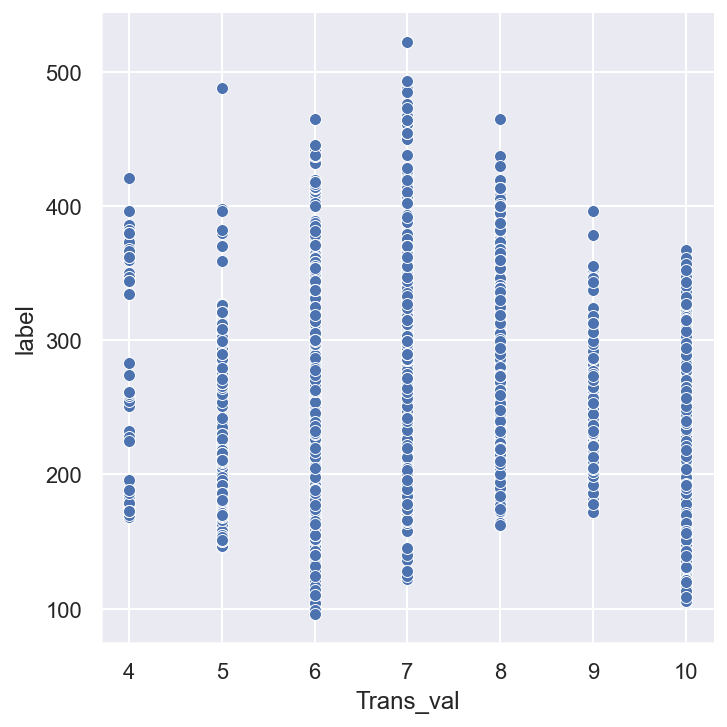

In [347]:
sns.relplot(x='Trans_val', y='label', data=data_trans_f2)

## OLS

In [348]:
# 상수항 추가
final_data_c = sm.add_constant(data_trans_final, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.183
Model:                             OLS   Adj. R-squared:                  0.182
Method:                  Least Squares   F-statistic:                     330.3
Date:                 Thu, 25 Mar 2021   Prob (F-statistic):          3.13e-320
Time:                         11:04:01   Log-Likelihood:                -39784.
No. Observations:                 7385   AIC:                         7.958e+04
Df Residuals:                     7379   BIC:                         7.962e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.6603      3.132     58.31

### 실린더 추가

In [349]:
data_trans_final['Cylinders'] = data['Cylinders']
data_trans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 404.0 KB


### OLS

In [350]:
# 상수항 추가
final_data_c = sm.add_constant(data_trans_final, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.730
Model:                             OLS   Adj. R-squared:                  0.730
Method:                  Least Squares   F-statistic:                     3326.
Date:                 Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:04:07   Log-Likelihood:                -35694.
No. Observations:                 7385   AIC:                         7.140e+04
Df Residuals:                     7378   BIC:                         7.145e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3796      1.922     52.22

### linear Regression

In [351]:
X_train, X_test, y_train, y_test = train_test_split(data_trans_final, labels, test_size=0.2, random_state=15)

lin_reg_trans2 = LinearRegression()
lin_reg_trans2.fit(X_train, y_train)

pred_tr = lin_reg_trans2.predict(X_train)
pred_test = lin_reg_trans2.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  30.470859691209668
RMSE of Test Data :  30.164614626108495


In [352]:
lin_reg_trans2.score(X_train, y_train)

0.7277803067259381

In [353]:
lin_reg_trans2.score(X_test, y_test)

0.7374345397430093

### 8로 할 경우
RMSE of Train Data :  30.48992229160252
RMSE of Test Data :  30.172726258810844
0.72743959835908
0.7372933066479026

### 10으로 할 경우
RMSE of Train Data :  30.470859691209668
RMSE of Test Data :  30.164614626108495


### OLS

In [156]:
trans_col = [col for col in list(data_ols.columns.values.flat) if 'Trans' in col]
data_trns = final_data2[trans_col]

# 상수항 추가
final_data_c = sm.add_constant(data_trns, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.246
Model:                             OLS   Adj. R-squared:                  0.243
Method:                  Least Squares   F-statistic:                     99.91
Date:                 Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                         17:02:06   Log-Likelihood:                -39488.
No. Observations:                 7385   AIC:                         7.903e+04
Df Residuals:                     7360   BIC:                         7.920e+04
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        186.7000      2.802     66.63

### LinearRegression

In [157]:
X_train, X_test, y_train, y_test = train_test_split(data_trns, labels, test_size=0.2, random_state=15)

lin_reg_trans = LinearRegression()
lin_reg_trans.fit(X_train, y_train)

pred_tr = lin_reg_trans.predict(X_train)
pred_test = lin_reg_trans.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  50.674055213272
RMSE of Test Data :  51.451314766750144


In [158]:
lin_reg_trans.score(X_train, y_train)

0.24712747911283373

In [159]:
lin_reg_trans.score(X_test, y_test)

0.23610267924204476

In [160]:
lin_scores = cross_val_score(lin_reg_trans, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [47.43706712 50.83828369 49.96419649 50.66010254 50.36617602 51.37644005
 51.64049599 53.58007866 50.32421846 52.24713019]
평균 :  50.84341892132515
표준 편차 :  1.525987583325904


## k-fold

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [112]:
def display_scores(scores):
    print("점수 : " , scores)
    print("평균 : " , scores.mean())    
    print("표준 편차 : ", scores.std())    
    
display_scores(tree_rmse_scores)

점수 :  [14.3642981  16.38956549 14.34193352 14.96679278 13.51041721 15.33726036
 15.76683247 15.76571019 14.47317622 14.63844832]
평균 :  14.955443465153579
표준 편차 :  0.8163650539979147


In [113]:
lin_scores = cross_val_score(lin_reg2, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [21.67861305 23.92958562 22.26240267 21.56299429 22.23157661 22.82900577
 22.70587056 21.94860629 22.57933998 22.234297  ]
평균 :  22.39622918397376
표준 편차 :  0.6441076368427853


## random forest regressor

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=13)
forest_reg.fit(X_train, y_train)

forest_pred_tr = forest_reg.predict(X_train)
forest_pred_test = forest_reg.predict(X_test)

forest_rmse_tr = (np.sqrt(mean_squared_error(y_train, forest_pred_tr)))
forest_rmse_test = (np.sqrt(mean_squared_error(y_test, forest_pred_test)))

print('RMSE of Train Data : ', forest_rmse_tr)
print('RMSE of Test Data : ', forest_rmse_test)

RMSE of Train Data :  12.768747132766896
RMSE of Test Data :  15.369413306240554


In [ ]:
forest_scores = cross_val_score()

## 여러개 모델 적용 with pipeline

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [100]:
models = [
    ('LinearRegression',LinearRegression()),
    ('RandomForestRegressor', RandomForestRegressor())
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=8))
]
models

[('LinearRegression', LinearRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('RandomForestRegressor', RandomForestRegressor())]

In [304]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('reg', LinearRegression())])

params = [{'reg':[LinearRegression()]},
          {'reg':[DecisionTreeRegressor()],
           'reg__max_depth': [4,6,8,10]
          },
          {'reg':[RandomForestRegressor()],
           'reg__n_estimators': [10, 100, 1000],
           'reg__max_depth' : [4, 6, 8, 10],
           'reg__min_samples_split': [2,3,4,5]
          }]

grid_pipeline = GridSearchCV(pipe, params, cv=5)
best_model = grid_pipeline.fit(X_train, y_train)

In [305]:
best_model.best_estimator_

Pipeline(steps=[('reg',
                 RandomForestRegressor(max_depth=10, min_samples_split=4))])

In [306]:
best_model.best_score_

0.7650266007806046

In [307]:
best_model.cv_results_

{'mean_fit_time': array([0.0244988 , 0.00610909, 0.00336046, 0.00262089, 0.00253601,
        0.01615276, 0.12257476, 1.22066479, 0.01385555, 0.12199373,
        1.21141696, 0.01344972, 0.12200155, 1.20758224, 0.01359267,
        0.12276525, 1.21337872, 0.01575179, 0.14202123, 1.37055578,
        0.01559768, 0.13769021, 1.36963744, 0.01527948, 0.13982539,
        1.38023119, 0.01540823, 0.14028301, 1.3885972 , 0.0168756 ,
        0.14774375, 1.48142757, 0.0164896 , 0.1518168 , 1.47549071,
        0.01631317, 0.15004854, 1.47051864, 0.01601501, 0.14769917,
        1.47828026, 0.01675124, 0.1538938 , 1.63406315, 0.01764235,
        0.1530292 , 1.51652646, 0.01660881, 0.15345364, 1.5169251 ,
        0.01660242, 0.15329714, 1.52747488]),
 'std_fit_time': array([4.00737942e-02, 6.14392599e-03, 1.06197743e-03, 1.61156456e-04,
        1.71948564e-05, 2.95236601e-03, 1.23449673e-03, 2.50663613e-02,
        7.34945209e-04, 3.12681632e-04, 7.61998401e-03, 9.91577568e-05,
        2.57704903e-04, 2

In [308]:
best_model.best_index_

48

In [310]:
best_model.best_params_

{'reg': RandomForestRegressor(max_depth=10, min_samples_split=4),
 'reg__max_depth': 10,
 'reg__min_samples_split': 4,
 'reg__n_estimators': 100}

In [ ]:
best_model.